In [ ]:
#Q1

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width  species
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   Setosa
2           4.9            3           1.4          0.2   Setosa
3           4.7          3.2           1.3          0.2   Setosa
4           4.6          3.1           1.5          0.2   Setosa

Data types:
sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
species         object
dtype: object

Unique values in feature columns:
sepal_length: ['sepal_length' '5.1' '4.9' '4.7' '4.6' '5' '5.4' '4.4' '4.8' '4.3' '5.8'
 '5.7' '5.2' '5.5' '4.5' '5.3' '7' '6.4' '6.9' '6.5' '6.3' '6.6' '5.9' '6'
 '6.1' '5.6' '6.7' '6.2' '6.8' '7.1' '7.6' '7.3' '7.2' '7.7' '7.4' '7.9']
sepal_width: ['sepal_width' '3.5' '3' '3.2' '3.1' '3.6' '3.9' '3.4' '2.9' '3.7' '4'
 '4.4' '3.8' '3.3' '4.1' '4.2' '2.3' '2.8' '2.4' '2.7' '2' '2.2' '2.5'
 '2.6']
pe

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

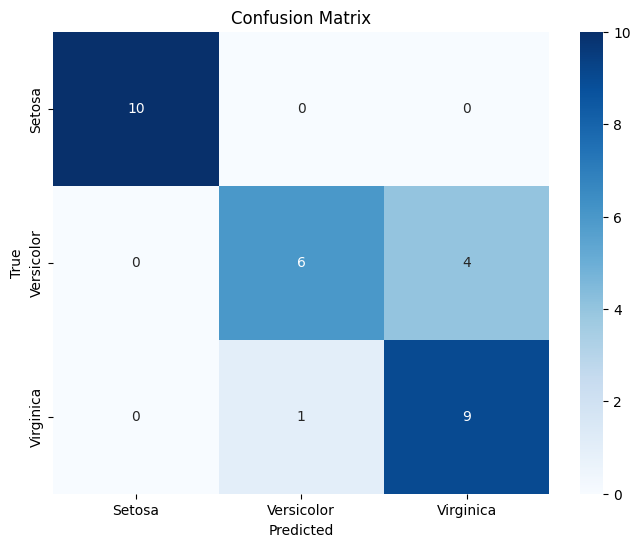

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('iris.csv', header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Inspect the first few rows and data types
print("First few rows of the dataset:")
print(data.head())
print("\nData types:")
print(data.dtypes)

# Check for any non-numeric values in the feature columns
print("\nUnique values in feature columns:")
for column in data.columns[:-1]:  # Exclude the species column
    print(f"{column}: {data[column].unique()}")

# Check for null or NaN values in the dataset
print("\nChecking for null values:")
print(data.isnull().sum())

# Convert all features to numeric, if not already
data.iloc[:, :-1] = data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

# Check again for any NaN values after conversion
print("\nChecking for NaN values after conversion:")
print(data.isnull().sum())

# Drop rows with NaN values (if any)
data = data.dropna()

# Prepare features and labels
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].factorize()[0]  # Convert species names to numeric values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the logistic regression model with One-vs-Rest strategy
model = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("\nCross-validated scores:", scores)

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Q2 -- Not done yet in Class

In [ ]:
#LAB 6

In [31]:
#1
# (Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes Classifier on the Iris dataset from sklearn.datasets using
#         (i) Step-by-step implementation
#         (ii) In-built function

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Step 3: Gaussian Naïve Bayes Classifier Implementation
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.variance = {}
        self.prior = {}

        # Calculate mean, variance, and prior probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.variance[c] = X_c.var(axis=0)
            self.prior[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variance[c])) - 0.5 * np.sum(((x - self.mean[c]) ** 2) / self.variance[c])
                posterior = prior + likelihood
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

# Step 4: Train the model
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9428571428571428
Confusion Matrix:
 [[40  0  0]
 [ 0 29  4]
 [ 0  2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.88      0.91        33
           2       0.88      0.94      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



In [30]:
#2
from sklearn.naive_bayes import GaussianNB

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train the Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#q2 ass6

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for K-NN
param_grid = {'n_neighbors': np.arange(1, 31)}  # Testing K from 1 to 30

# Initialize K-NN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best K: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Use the best estimator to predict on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Best K: 3
Best Cross-Validation Accuracy: 0.96
Test Accuracy: 1.00
